** *This notebook is unfinished and still under development* **

# 1D NMR Processing and Display

a simplified environment for processing 1D Bruker NMR datasets with `SPIKE`.

Run each python cell in sequence by using the ⇥Run button above (or typing *shift* Enter).

Cells are meant to be used in order, taking you to the complete analysis, but you can go back at any time.

The SPIKE code used for processing is visible in the cells, and can be used as a minimal tutorial.

***Remark*** *to use this program, you should have installed the following packages:*

- *a complete scientific python environment* ( *tested with python 3.6 - [anaconda](https://www.anaconda.com/) 
 but it should also work in python 2.7*)
- [`spike`](https://www.bitbucket.org/delsuc/spike) ( *version 0.99.9 minimum* )
- [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/)  ( *tested with version 7.1* )
- [`ipyml`](https://github.com/matplotlib/jupyter-matplotlib)  ( *adds interactivity in the notebook* )

## Initialization
the following cell should be run only once, at the beginning of the processing

In [1]:
# load all python and interactive tools
from __future__ import print_function, division
from IPython.display import display, HTML, Markdown, Image
display(Markdown('## STARTING Environment...'))
%matplotlib notebook
import os.path as op
import spike
from spike.File.BrukerNMR import Import_1D
from spike.Interactive import INTER as I
from spike.Interactive.ipyfilechooser import FileChooser
display(Markdown('## ...program is Ready'))
I.hidecode()

## STARTING Environment...


          SPIKE
    Version     : 0.99.12
    Date        : 03-10-2019
    Revision Id : 430
*** bokeh_display not loaded ***
*** wavelet not loaded ***
*** zoom3D not loaded ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  FTMS_calib,  Fitter,  Integrate,  Linear_prediction,  PALMA,  Peaks,  apmin,  bcorr,  fastclean,  gaussenh,  pg_sane,  rem_ridge,  sane,  sg,  test,  urQRd, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin


## ...program is Ready

### Choose the file
The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- use the `Select` button
- modify the ( *optional* ) `path` argument, to start the exploration on a given location
- After the selection, the selected filename is found in `FC.selected`

In [2]:
FC = FileChooser(path='/home/mad/Documents/DATA/',filename='fid')
display(FC)

FileChooser(path='/home/mad/Documents/DATA', filename='fid', show_hidden='False')

### Import dataset

This is simply done with the `Import_1D()` tool, which returns a `SPIKE` object.

We store the dataset into a variable, typing the variable name shows a summary of the dataset. 

Reading file  /home/mad/Documents/DATA/ARTEref/1/fid


<IPython.core.display.Javascript object>


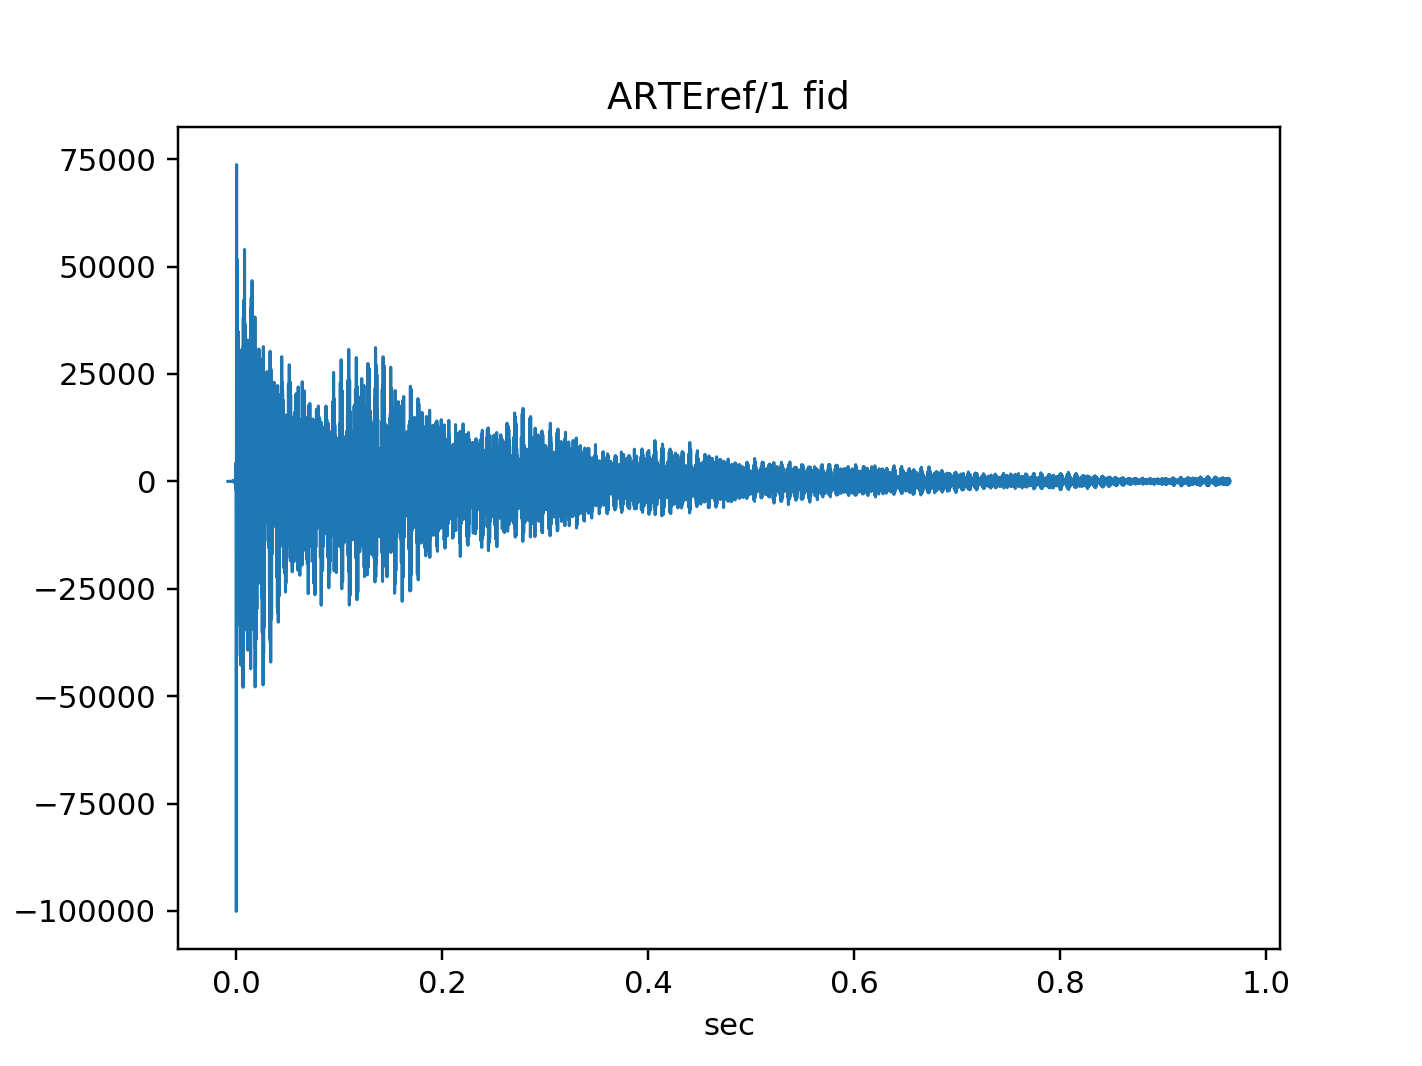

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  8192 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

In [3]:
print('Reading file ',FC.selected)
d1 = Import_1D(FC.selected)
d1.filename = FC.selected
d1.set_unit('sec').display(title=FC.nmrname+" fid")

In the current set-up, the figure can be explored *(zoom, shift, resize, etc)* with the jupyter tools displayed  below the dataset.
The figure can also be saved as a `png` graphic file.

At anytime, the figure can be frozen by clicking on the blue button on the upper right corner, just rerun the cell to make it interactive again.

## Basic Processing
We are going to use a basic processing set-up, check the documentation for advanced processing

### Fourier Transform

<IPython.core.display.Javascript object>


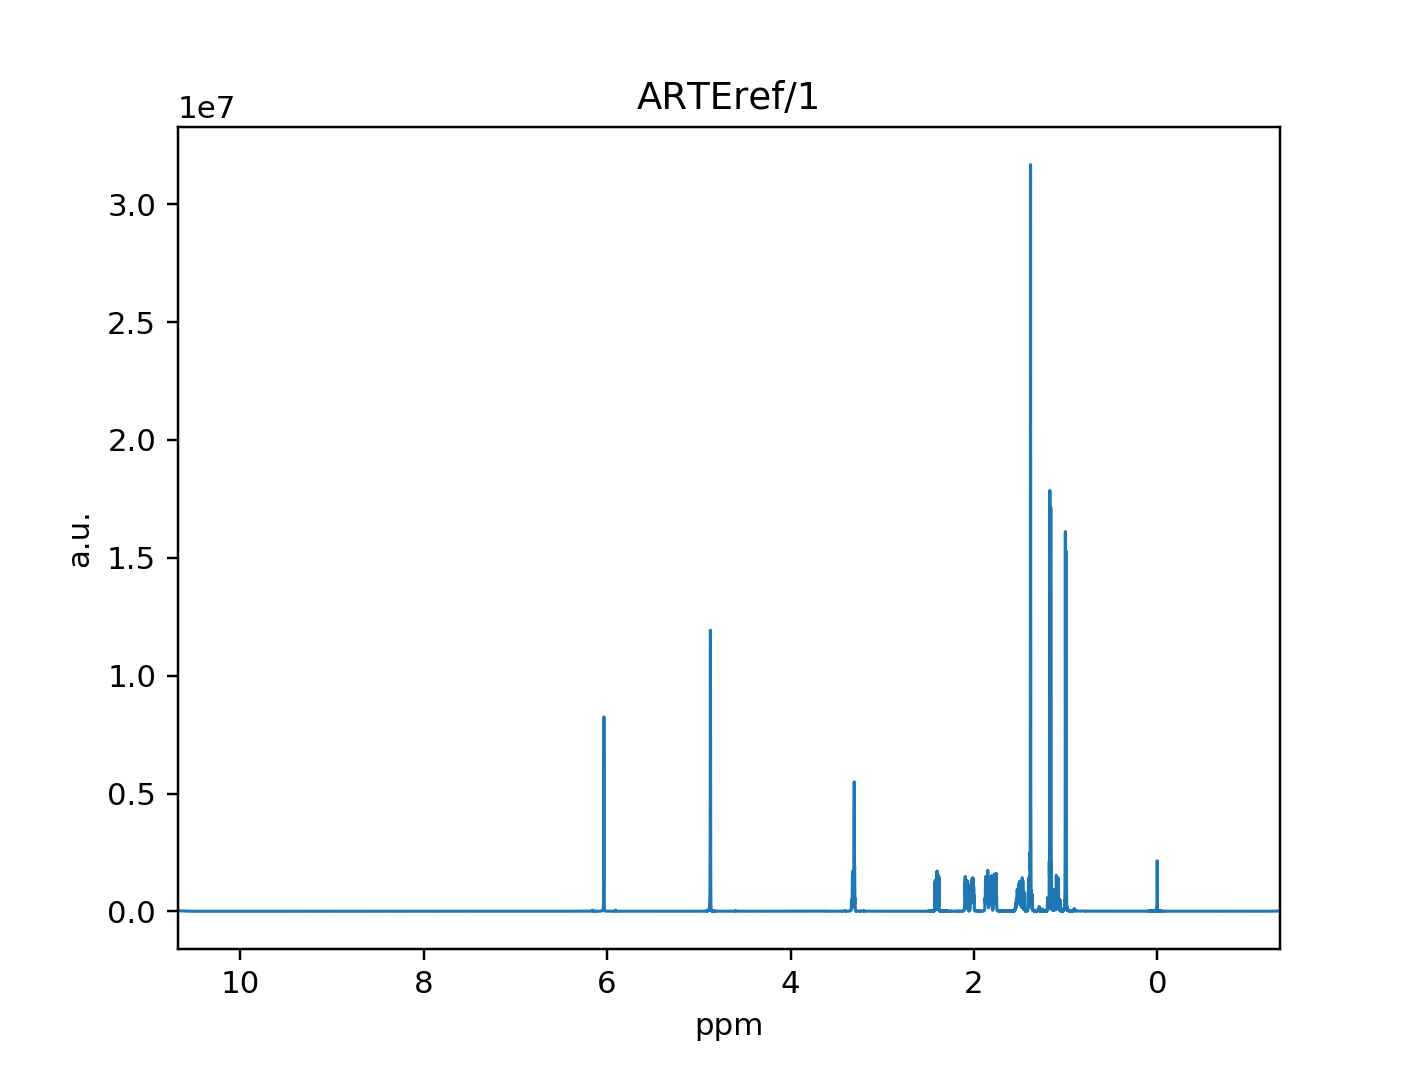

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  32768 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

In [4]:
D1 = d1.copy() # copy the imported data-set to another object for processing
D1.apod_em(0.3).zf(4).ft_sim().bk_corr().apmin()  # chaining  apodisation - zerofill - FT - Bruker correction - autophase
D1.set_unit('ppm').display(title=FC.nmrname)  # chain  set to ppm unit - and display

### rephasing
If is is required use the interactive phaser

Use `scale` and `zoom` to tune the display; then use `P0, P1, pivot` to optimize the phase.

Once finished, click on `Apply correction`

<IPython.core.display.Javascript object>


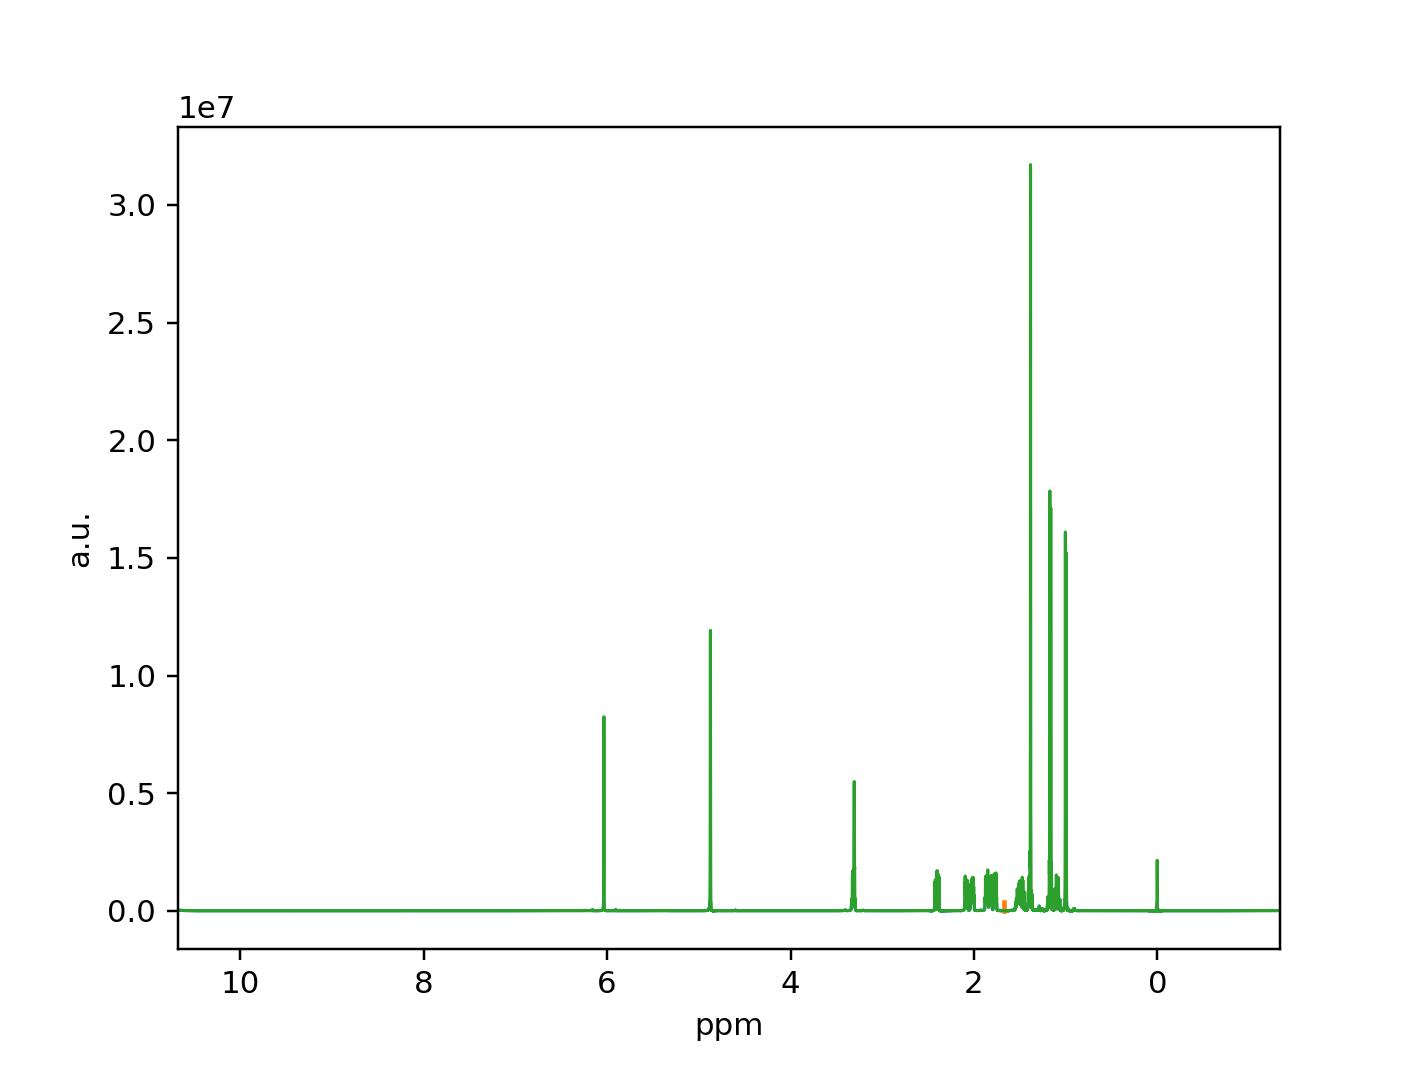

Applied: phase(0.2,  1.0)


In [5]:
I.Phaser1D(D1);

### Baseline correction
A simple interactive baseline correction tool

<IPython.core.display.Javascript object>


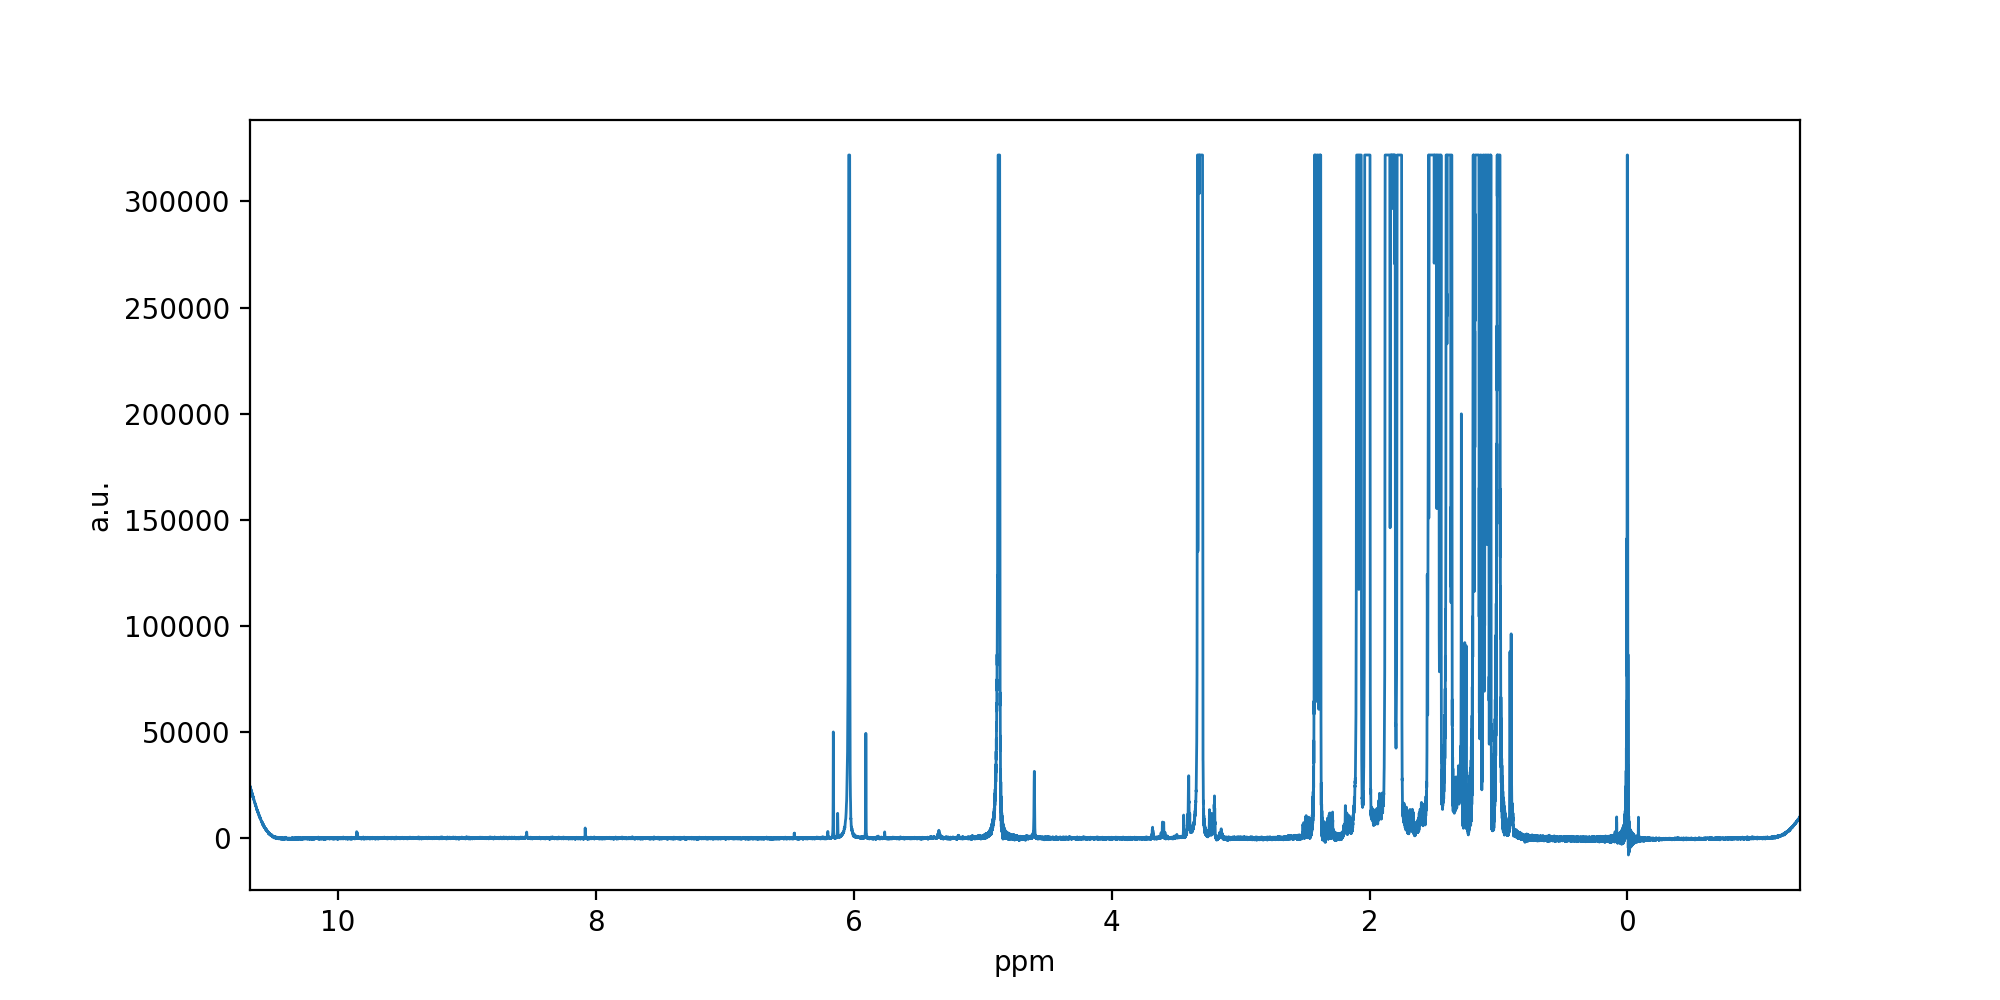

Applied correction:
 [10.359060489398441, 8.916351553391516, 7.545778064184937, 4.2515926603024585, -0.8219337646552277, 0.4284139798841071]


In [6]:
I.baseline1D(D1);

## Peak-Picker
- moving the threshold determines the minimum peak intensity
- peaks are searched only in the selected zoom window

<IPython.core.display.Javascript object>


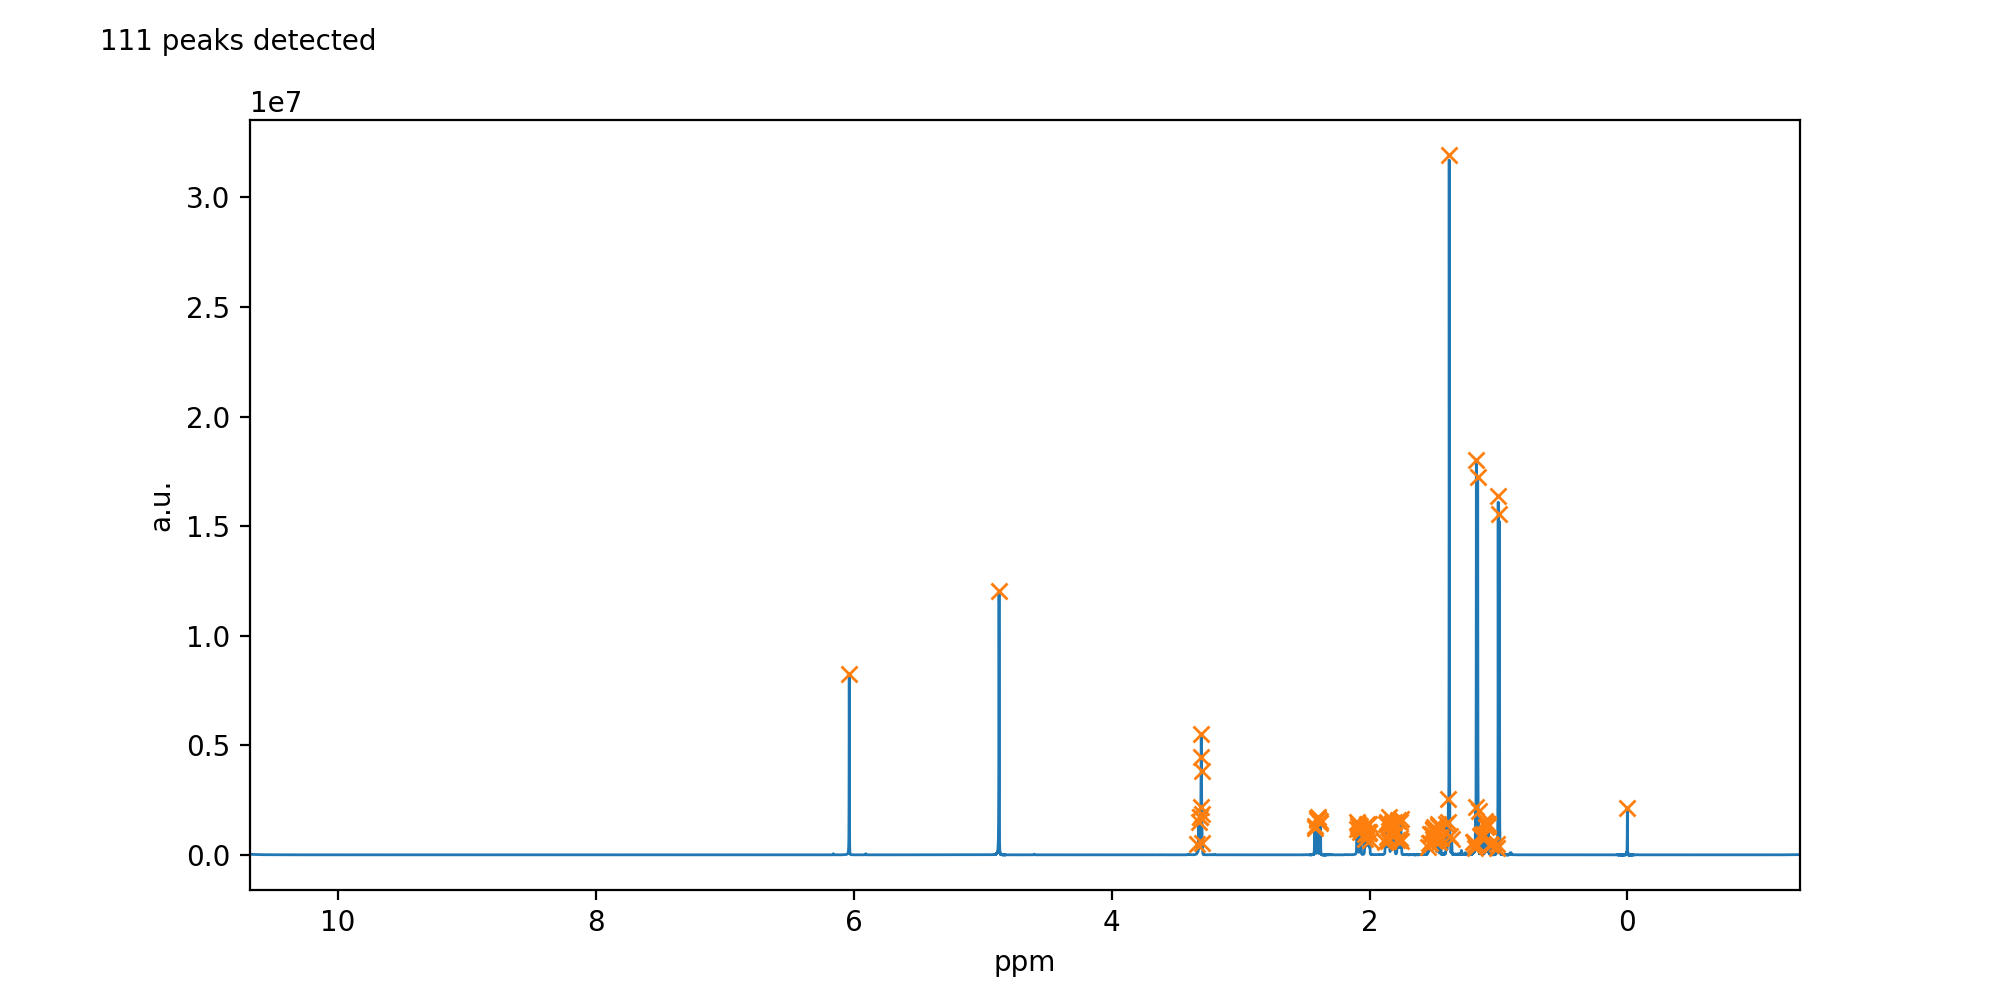

Output(layout=Layout(border='1px solid red'))

In [7]:
ph = I.NMRPeaker1D(D1);

## Integrate
Integration zones are computed from the peaks detected with the Peak-Picker above.


<IPython.core.display.Javascript object>


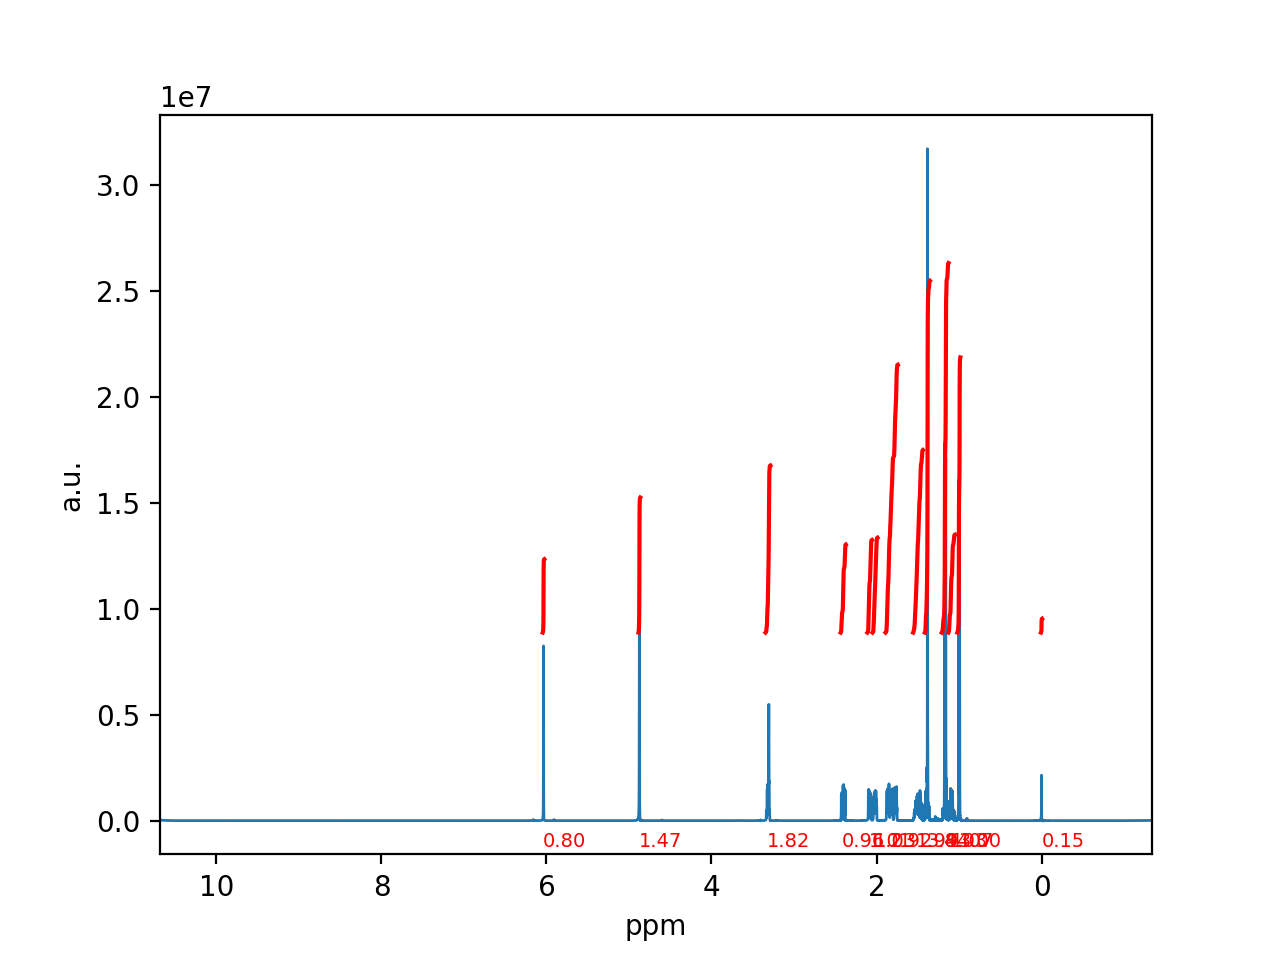

Output(layout=Layout(border='1px solid red'))

In [8]:
I.NMRIntegrate(D1);

## Interactive composite display
Convenient to set-up your own figure

<IPython.core.display.Javascript object>


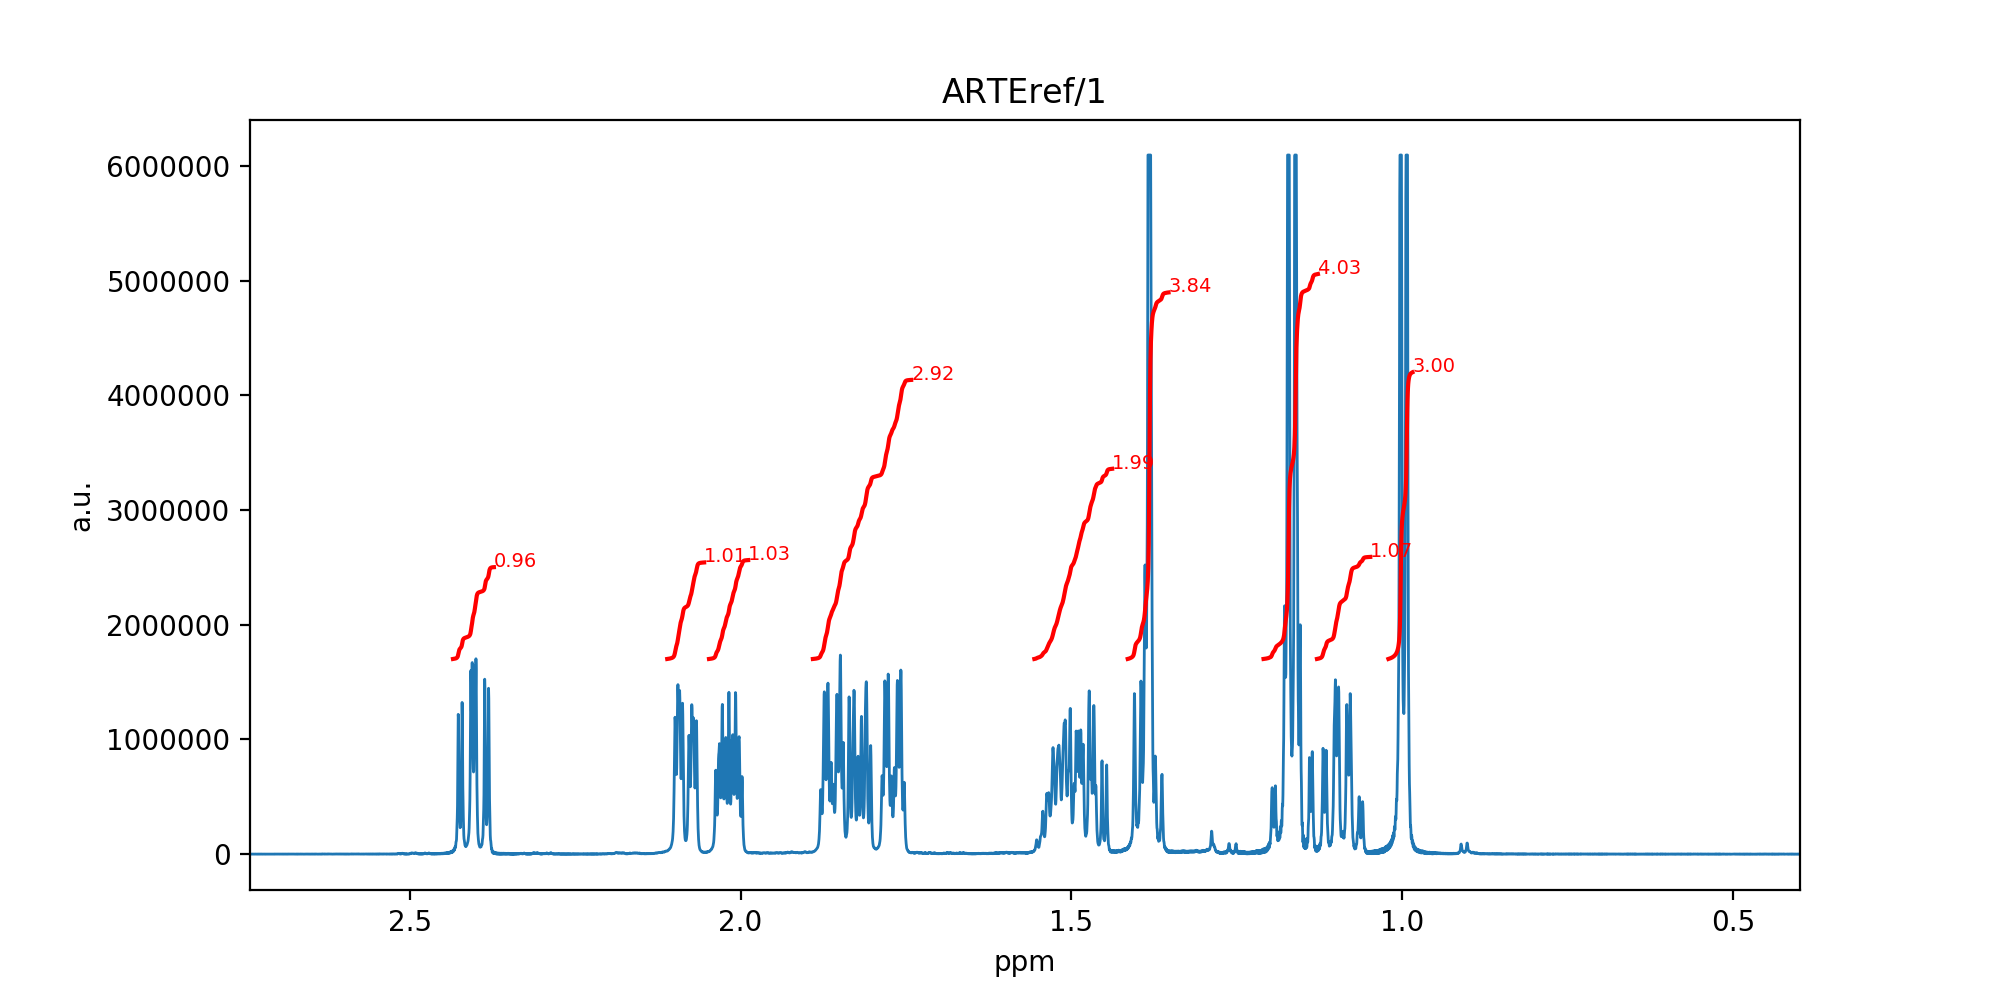

In [9]:
I.Show1Dplus(D1,title=FC.nmrname);

## Save the data-set
either as stand alone native SPIKE files, (there are other formats)

In [10]:
D1.save('example1.gs1')

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  32768 real points,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is real

or as a `csv` text file, - in which case, it is probably better to remove the imaginary part, not useful there.

The file contains some basic informations in addition to the spectral data

In [11]:
D1.copy().real().save_csv('example.csv')

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  32768 real points,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is real

### Save the peak list to a csv file

In [12]:
D1.pk2pandas().to_csv('peaklist.csv')

### Save the integrals to a csv file

In [13]:
D1.integrals.to_pandas().to_csv('integrals.csv')

## Export a buckelist

In [14]:
# adapt the parameters below
Zoom = (0.5,8)                    # zone to bucket       - (start, end) in ppm
BucketSize = 0.04                 # width of the buckets - in ppm
Output = 'screen'                 # 'screen'  or  'file'  determines output
BucketFileName = 'bucket.csv'     #  the filename if Output (above) is 'file'  - don't forget the .csv extension.

In [15]:
# the following cell executes the bucketing
if Output == 'file':
    with open(BucketFileName,'w') as F:
        D1.bucket1d(zoom=Zoom, bsize=BucketSize, pp=True, file=F)
    print('buckets written to %s\n'%op.realpath(BucketFileName))
else:
    D1.bucket1d(zoom=Zoom, bsize=BucketSize, pp=True);

PP: 1318 detected
# 188 buckets with a mean size of 109.02 data points
center, bucket, max, min, std, peaks_nb, bucket_size
0.500, -7301.9, 851.4, -1575.9, 610.0, 0, 110
0.540, -7145.3, 874.1, -1503.5, 643.1, 0, 109
0.580, -5516.8, 1116.7, -1435.9, 662.6, 0, 109
0.620, -3446.2, 1420.2, -1528.1, 715.1, 0, 109
0.660, -1012.2, 1194.1, -1254.8, 695.3, 0, 109
0.700, -772.7, 1162.0, -1336.3, 736.0, 0, 109
0.740, 3983.0, 1590.6, -1182.1, 745.8, 0, 109
0.780, 5241.4, 2007.3, -1935.4, 875.8, 0, 109
0.820, 21400.8, 2826.2, -1000.0, 955.3, 10, 109
0.860, 49263.4, 4390.1, -160.9, 1111.8, 26, 109
0.900, 527672.7, 96283.8, 962.4, 22208.1, 20, 109
0.940, 150787.8, 17308.9, 1260.9, 3393.5, 27, 109
0.980, 30669946.4, 15212520.8, 3000.9, 2931079.1, 20, 109
1.020, 28411391.1, 16092796.7, 3833.2, 3089206.3, 23, 109
1.060, 5322542.7, 1399824.3, 3453.6, 317882.6, 17, 109
1.100, 14739399.4, 1520580.5, 69209.1, 440093.9, 12, 109
1.140, 15706220.9, 6136097.7, 22783.1, 1045754.2, 15, 109
1.180, 62920903.7, 1783

*Tools in this page is under intensive development - things are going to change rapidly.*